# pytorch

## 关系拟合 (回归)

In [3]:
"""
View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss



Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


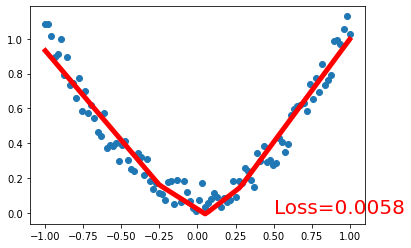

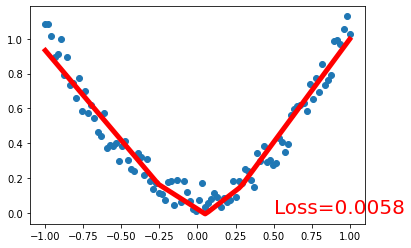

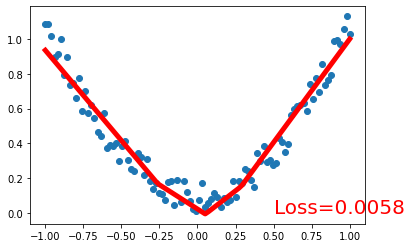

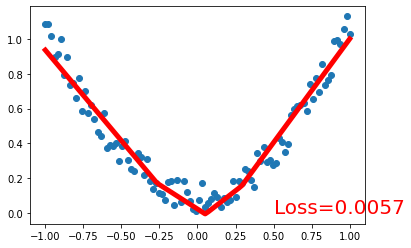

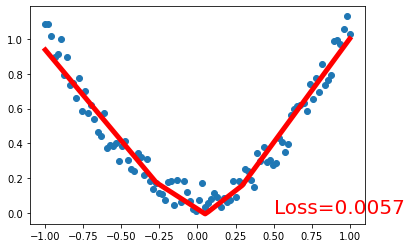

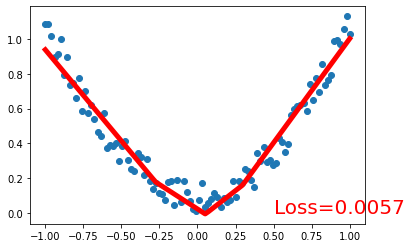

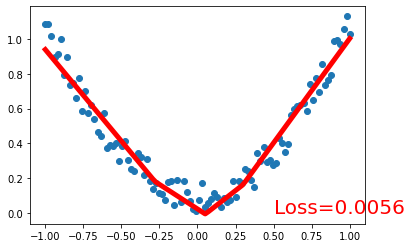

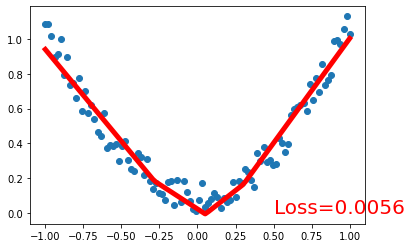

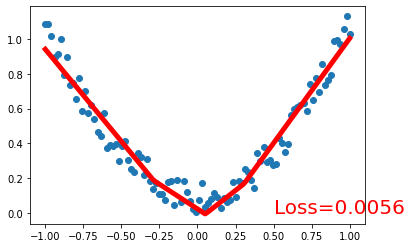

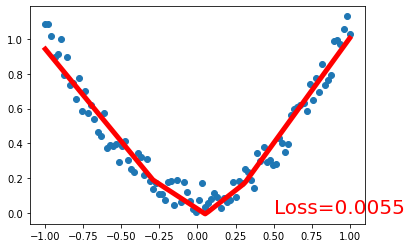

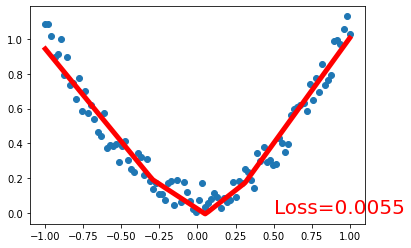

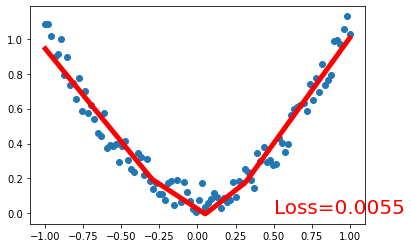

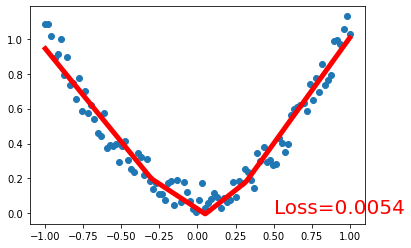

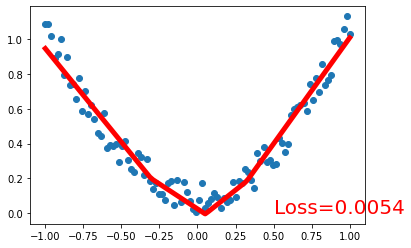

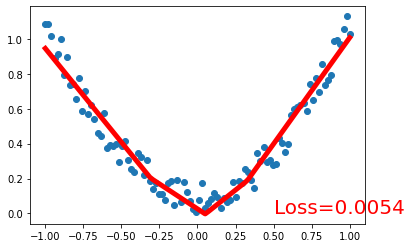

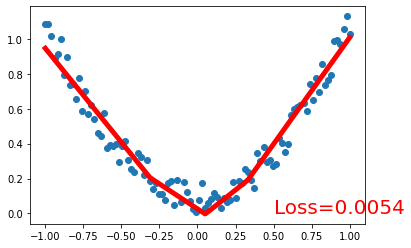

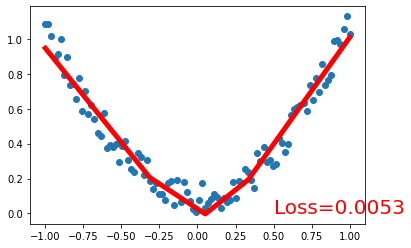

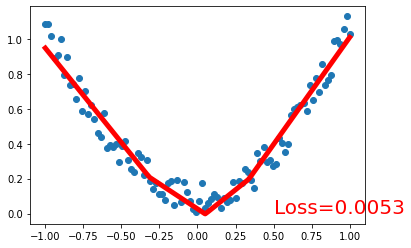

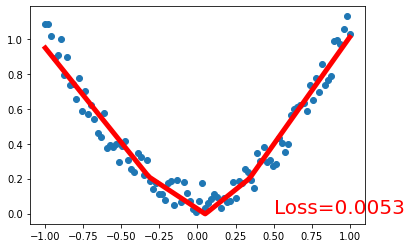

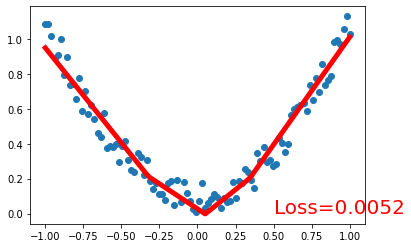

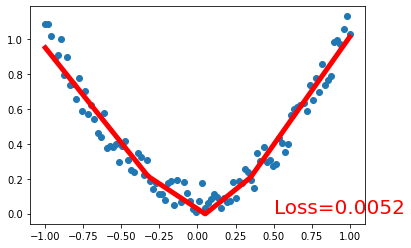

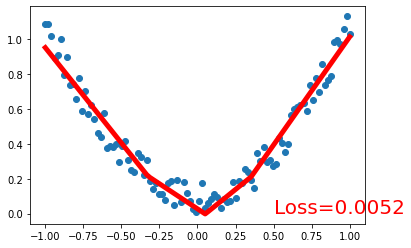

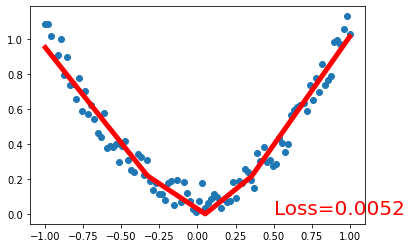

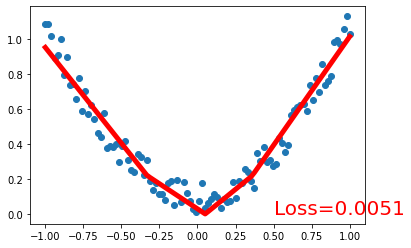

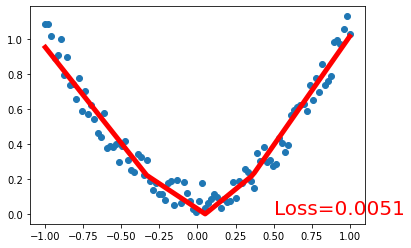

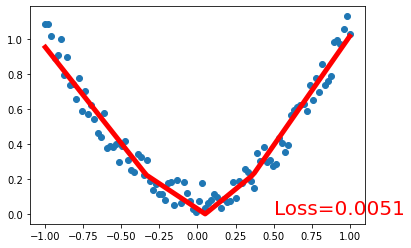

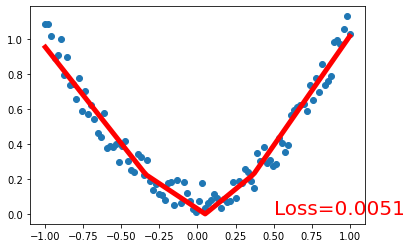

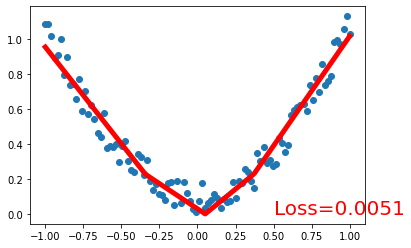

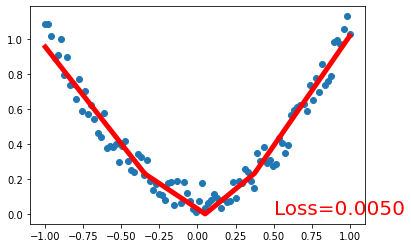

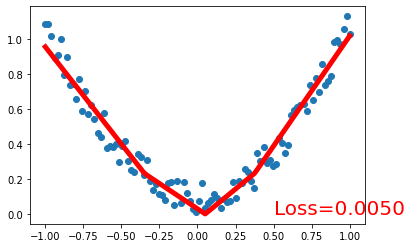

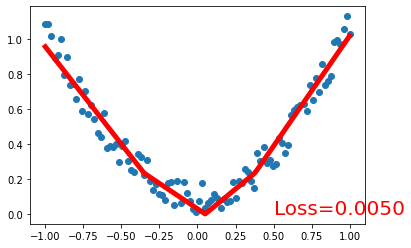

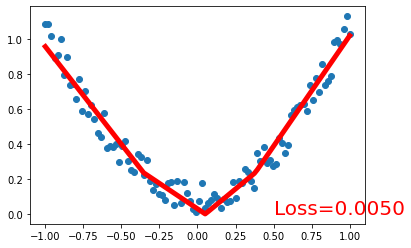

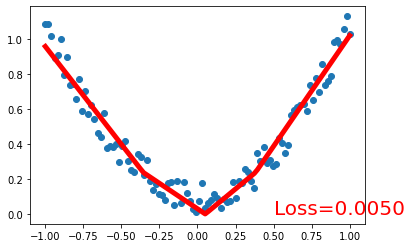

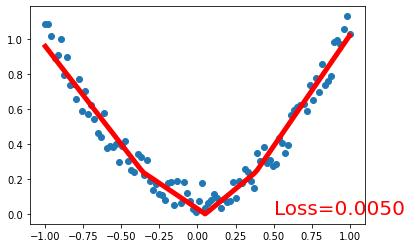

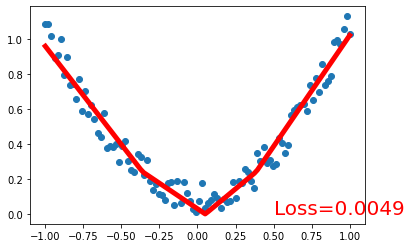

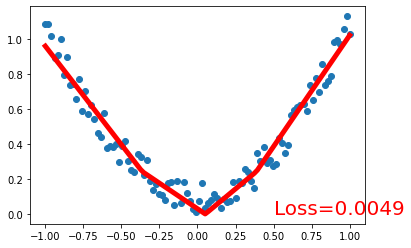

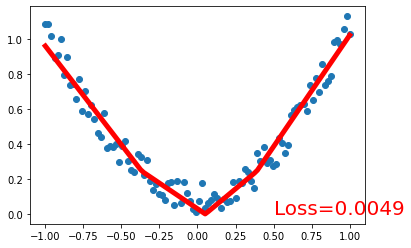

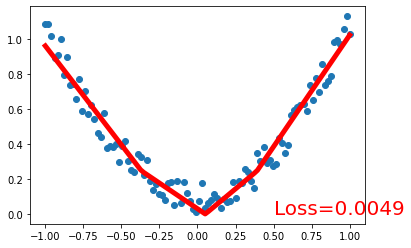

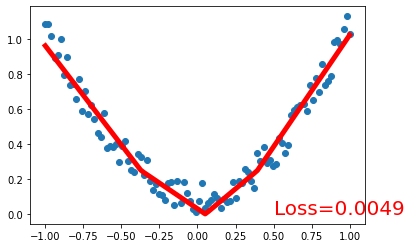

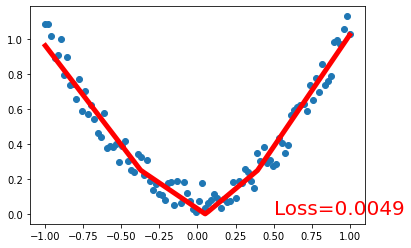

In [5]:
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()
#plt.ion()   # something about plotting

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [2]:
ls *.png

vocabularyresult.png*


## 区分类型 (分类)

# pytorch learning hands-on

## getting_started

In [2]:
import torch
import numpy as np

uninitialized = torch.Tensor(3, 2)
rand_initialized = torch.rand(3, 2)

print(uninitialized)
print(rand_initialized)

tensor([[8.4078e-45, 0.0000e+00],
        [8.7446e+19, 4.5853e-41],
        [8.7446e+19, 4.5853e-41]])
tensor([[0.7785, 0.7832],
        [0.3000, 0.9911],
        [0.6596, 0.5914]])


In [4]:
# Shape of the tensor
size = rand_initialized.size()
print(size)

# Numpy like API for shape
shape = rand_initialized.shape
print(shape)

# Both are same
print(shape == size)

# indexing through the shape object, same as python tuple
print(shape[0])
print(shape[1])

torch.Size([3, 2])
torch.Size([3, 2])
True
3
2


In [5]:
# Operations
x = torch.ones(3, 2)

# normal operators
y = torch.ones(3, 2) * 2
y = y + 2
z = torch.ones(2, 1)
# x -> 3x2
# y -> 3x2
# z -> 2x1
x_y = x * y  # element wise mul -> 3x2
x_y_z = x_y @ z  # matrix multiplication, (3x2) . (2x1) -> a 3x1 matrix
print(x)
print(y)
print(z)
print(x_y)
print(x_y_z)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])
tensor([[1.],
        [1.]])
tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])
tensor([[8.],
        [8.],
        [8.]])


In [6]:
# Addition 1 + 2 > 3
z = x + y  # using operators
print(z)

z = x.add(y)  # using pytorch function, torch.add does the same
print(z)

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])
tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])


In [7]:
z = x.add_(y)  # in place addition.
print(z)
print(x)  # value after addition

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])
tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])


In [8]:
# multiplication
x = torch.rand(2, 3)
y = torch.rand(3, 4)
x.matmul(y)  # tensor of size 2x4

tensor([[0.4658, 0.5002, 0.8582, 0.5461],
        [1.1370, 1.1671, 1.3049, 0.6041]])

In [9]:
# number of elements in a tensor
x = torch.rand(2, 3)
print(x.numel())

6


In [11]:
# Slicing, joining, indexing and mutating
# pythonic indexing
x = torch.rand(2, 3, 4)
x_with_2n3_dimension = x[1, :, :]
scalar_x = x[1, 1, 1]  # first value from each dimension
scalar_x

tensor(0.0118)

In [12]:
# numpy like slicing
x = torch.rand(2, 3)
print(x[:, 1:])  # skipping first column
print(x[:-1, :])  # skipping last row

tensor([[0.1868, 0.5019],
        [0.5962, 0.4167]])
tensor([[0.1806, 0.1868, 0.5019]])


In [13]:
# transpose
x = torch.rand(2, 3)
print(x)
print(x.t())  # size 3x2

tensor([[0.2317, 0.5926, 0.9514],
        [0.2627, 0.0778, 0.7227]])
tensor([[0.2317, 0.2627],
        [0.5926, 0.0778],
        [0.9514, 0.7227]])


In [14]:
# concatenation and stacking
x = torch.rand(2, 3)
concat = torch.cat((x, x))
print(concat)  # Concatenates 2 tensors on default zeroth dimension

tensor([[0.2240, 0.9397, 0.1570],
        [0.0396, 0.5131, 0.0085],
        [0.2240, 0.9397, 0.1570],
        [0.0396, 0.5131, 0.0085]])


In [15]:
x = torch.rand(2, 3)
concat = torch.cat((x, x), dim=1)
print(concat)  # Concatenates 2 tensors on first dimension

tensor([[0.3519, 0.9085, 0.1877, 0.3519, 0.9085, 0.1877],
        [0.9304, 0.9014, 0.1128, 0.9304, 0.9014, 0.1128]])


In [16]:
x = torch.rand(2, 3)
stacked = torch.stack((x, x), dim=0)
print(stacked)  # concatenated a tensor to new dimension, returns 2x2x3 tensor

tensor([[[0.1615, 0.3250, 0.7641],
         [0.3464, 0.0385, 0.4224]],

        [[0.1615, 0.3250, 0.7641],
         [0.3464, 0.0385, 0.4224]]])


In [17]:

# split: you can use chunk as well
x = torch.rand(2, 3)
splitted = x.split(split_size=2, dim=0)  # get 2 tensors of 2 x 2 and 1 x 2 size
print(splitted)

(tensor([[0.7266, 0.7609, 0.6813],
        [0.9199, 0.7259, 0.7050]]),)


In [18]:

# squeeze and unsqueeze
x = torch.rand(3, 2, 1)  # a tensor of size 3 x 2 x 1
squeezed = x.squeeze()
print(squeezed)  # remove the 1 sized demension

tensor([[0.1992, 0.2099],
        [0.5170, 0.6389],
        [0.4497, 0.3475]])


In [19]:
x = torch.rand(3)
with_fake_dimension = x.unsqueeze(0)
print(with_fake_dimension)  # added a fake zeroth dimension

tensor([[0.8918, 0.2325, 0.6197]])


In [20]:
# to numpy
th_tensor = torch.rand(3, 2)
np_tensor = th_tensor.numpy()
print(type(th_tensor), type(np_tensor))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [21]:

# from numpy
np_tensor = np.random.rand(3, 2)
th_tensor = torch.from_numpy(np_tensor)
print(type(np_tensor), type(th_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


In [22]:
# more fun with th-np conversion
th_arange = torch.arange(1, 4)
np_arange = np.arange(1, 4)
print('would torch-numpy bridge work -> ', th_arange.numpy() == np_arange)



would torch-numpy bridge work ->  [ True  True  True]


In [23]:
# GPU (CUDA) tensors
x = torch.rand(4, 3)
y = torch.rand(4, 3)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    z = x + y  # operation executed on GPU
else:
    print('No GPU available')

No GPU available


In [5]:
#this saving and loading method is not the recommended one.
#check here for more info pytorch.org/docs/master/notes/serialization.html
#saving model
x = torch.rand(3, 2)
torch.save(x, 'path')
print(x)
#load
x = torch.load('path')
#Find more operations here: http://pytorch.org/docs/master/torch.html
print(x)

tensor([[0.6392, 0.6883],
        [0.3900, 0.5669],
        [0.1152, 0.8943]])
tensor([[0.6392, 0.6883],
        [0.3900, 0.5669],
        [0.1152, 0.8943]])


In [6]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/03littlecode_test'

In [10]:
ls ./path

./path


## A Simple Neural Network

In [13]:
import torch
inputs = torch.FloatTensor([2])
weight = torch.rand(1, requires_grad=True)
bias = torch.ones(1, requires_grad=True)
t = inputs * weight
out = t + bias
out.backward()


In [14]:
weight.grad


tensor([2.])

In [15]:
bias.grad

tensor([1.])